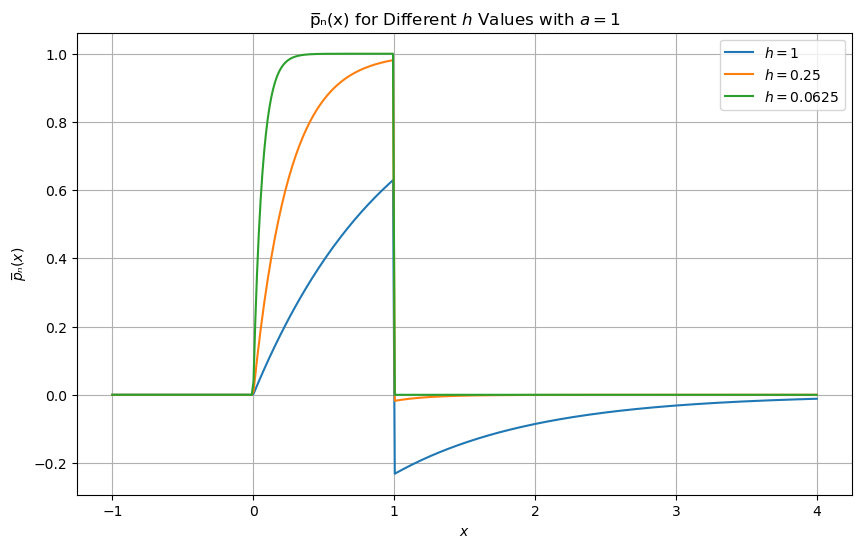

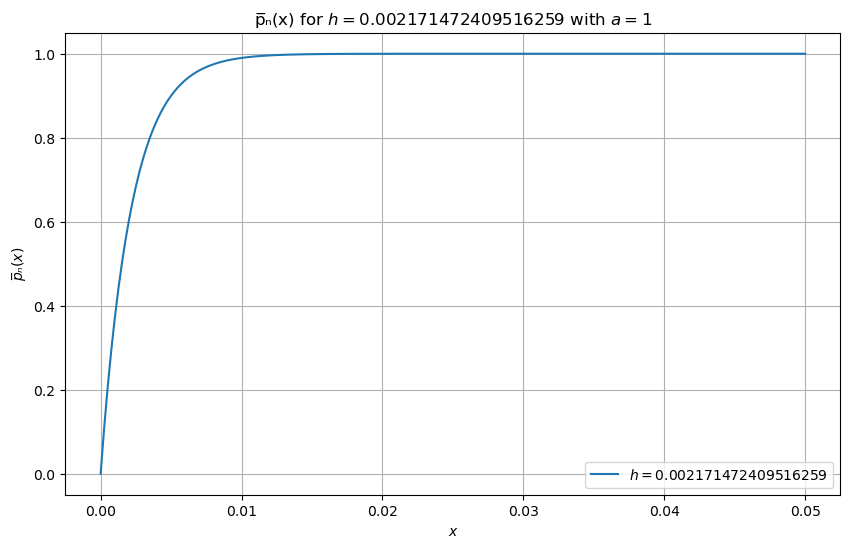

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ================================
# Define the piecewise function for p̅ₙ(x)
# p̅ₙ(x) is calculated for three cases based on the value of x
# 1. x < 0 -> 0
# 2. 0 <= x <= a -> (1/a) * (1 - exp(-x/h))
# 3. x > a -> (1/a) * (exp(-a/h) - 1) * exp(-x/h)
# ================================
def piecewise_function(x, a, h):
    return np.piecewise(x, [x < 0, (0 <= x) & (x <= a), x > a], [
        lambda x: 0,
        lambda x: 1/a*(1-np.exp(-x/h)),
        lambda x: 1/a*(np.exp(-a/h)-1)*np.exp(-x/h)
    ])

# ================================
# Set up parameters and plot the distribution for h_n values
# h_n = {1, 1/4, 1/16} and a = 1
# Generate and display the plots
# ================================
a_value = 1
x_values = np.linspace(-1, a_value+3, 400)
h_values = [1, 1/4, 1/16]

# ================================
# Create a figure for the plot and loop through h_values
# Each h_value will generate its corresponding plot
# ================================
fig, ax = plt.subplots(figsize=(10, 6))

for h in h_values:
    y_values = piecewise_function(x_values, a_value, h)
    ax.plot(x_values, y_values, label=f'$h={h}$')

# ================================
# Add labels, title, legend, and grid
# Show the plot
# ================================
ax.set_xlabel('$x$')
ax.set_ylabel('$p̅ₙ(x)$')
ax.legend()
plt.title(f'p̅ₙ(x) for Different $h$ Values with $a={a_value}$')
plt.grid(True)
plt.savefig('output_plots/different_h_values.png')
plt.show()

# ================================
# Plot for a smaller x range (0 < x < 0.05)
# Use h_n = 0.0021714724 for bias less than 1%
# ================================
x_values = np.linspace(0, 0.05, 400)
h_value_bias = 0.01 / np.log(100)

# ================================
# Create a new figure for this smaller range and plot
# ================================
fig, ax = plt.subplots(figsize=(10, 6))

y_values = piecewise_function(x_values, a_value, h_value_bias)
ax.plot(x_values, y_values, label=f'$h={h_value_bias}$')

# ================================
# Add labels, title, legend, and grid
# Show the plot
# ================================
ax.set_xlabel('$x$')
ax.set_ylabel('$p̅ₙ(x)$')
ax.legend()
plt.title(f'p̅ₙ(x) for $h={h_value_bias}$ with $a={a_value}$')
plt.grid(True)
plt.savefig('output_plots/small_x_range.png')
plt.show()
